<a href="https://colab.research.google.com/github/luquelab/lab-data-science/blob/data-distribution/notebooks/analyze_multimodal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze multimodal data

## Description

## Quick-start guide

## Import libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Input data and parameters

In [22]:
# Load data as CSV (adjust path as needed)
df = pd.read_csv('data_sample.csv')

## Rename first column to 'feature'
first_col = df.columns[0]
df = df.rename(columns={first_col: 'feature'})
print(f"Dataset shape: {df.shape}")


Dataset shape: (1000, 1)


# Code

## Prototype

In [ ]:
# Import libraries

# Load data

# Summarize the statistics of the data

# Visual exploration of data distribution

# Input multimode constraints

# Obtain modes

# Generate plot with distribution and histogram

# Save analysis

## Definitions

### Functions

#### Freedman-Diaconis rule
This rule uses the interquartile range (IQR) and is widely regarded as robust for various distributions, including normal ones. The formula for bin width is:

`h = 2 x IQR x n^(-1/3)`

Where
+ `h` is the bandwidth
+ `IQR` is the interquartile range of data
+ `n` is the number of observations

This method adjusts the bin width based on data spread and sample size, making it suitable for normal distributions. For more information see [Statistics How To](https://www.statisticshowto.com/choose-bin-sizes-statistics/)


In [58]:
def freedman_diaconis_rule(data):
  """
  Calculates the optimal bin size using the Freedman-Diaconis rule.

  Args:
    data: A 1D numpy array or pandas Series of numerical data.

  Returns:
    The optimal bin width.
  """
  iqr = np.percentile(data, 75) - np.percentile(data, 25)
  bin_width = 2 * iqr / (len(data) ** (1/3))
  return bin_width

# Example usage (assuming 'feature' column in your DataFrame):
#bin_size = freedman_diaconis_rule(df['feature'])
#print(f"Optimal bin size (Freedman-Diaconis Rule): {bin_size}")

#### Rice rule
The Rice Rule provides a simple approximation for determining the number of bins (
k):

`k = 2 x n^(1/3)`

The bin width can then be calculated as:

`h = range/k`

Where `n` is the number of observations.

This method is less sensitive to outliers and works reasonably well for large datasets, but it may oversmooth smaller datasets. For more information see [Statistics How To](https://www.statisticshowto.com/choose-bin-sizes-statistics/)


In [60]:
def rice_rule(data):
  """
  Calculates the optimal bin size using the Rice rule.

  Args:
    data: A 1D numpy array or pandas Series of numerical data.

  Returns:
    The optimal bin width.
  """
  bin_width = 2 * np.std(data) / (len(data) ** (1/3))
  return bin_width

# Example usage (assuming 'feature' column in your DataFrame):
#bin_size = rice_rule(df['feature'])

#### Sturges’ rule
Sturges’ Rule calculates the number of bins based on logarithmic scaling:

`k = 1 + log2(n)`

Where `k` is the number of bins and `n` is the number of observations. While simple, this rule often oversmooths histograms for large datasets, making it less suitable for precise analysis. For more information see [Statistics How To](https://www.statisticshowto.com/choose-bin-sizes-statistics/)

In [61]:
def sturges_rule(data):
  """
  Calculates the optimal bin size using Sturge's rule.

  Args:
    data: A 1D numpy array or pandas Series of numerical data.

  Returns:
    The optimal bin width.
  """
  k = 1 + np.log2(len(data))
  return k

# Example usage (assuming 'feature' column in your DataFrame):
#bin_size = sturges_rule(df['feature'])
#print(f"Optimal bin size (Sturges' Rule): {bin_size}")

## Descriptive statistics

Generate summary statistics and supplement with skewness and kurtosis.

For categorical variables, use `.value_counts(normalize=True)`

Typical values to interpret [skewness](https://en.wikipedia.org/wiki/Skewness):
+ `0`: Zero skewness: Symmetrical distribution
+ `>0`: Positive skewness (right-skewed): The tail on the right side is longer or fatter.
+ `<0`: Negative skewness (left-skewed): The tail on the left side is longer or fatter.
+ `0`: Normal distribution
+ `1`: Half-normal distribution
+ `2`: Exponential distribution
+ `>0`: Lognormal distribution

Typical values to interpret the [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis):
+ `~3`: Mesokurtic: A normal distribution with moderate tails.
+ `>3`: Leptokurtic: A distribution with heavy tails.
+ `<3`: Platykurtic: A distribution with light tails.

In [38]:
# Summary stats
stats_summary = df.describe(include='all').T
stats_summary['range'] = df.max() - df.min()
stats_summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
stats_summary['skewness'] = df.skew()
stats_summary['kurtosis'] = df.kurtosis()


In [39]:
# Export the summary
# stats_summary.to_csv('statistical_summary.csv')
stats_summary.T.to_csv('statistical_summary.csv')

## Qualitative multimodality assessment

Visualize potential multimodality by superimposing a kernel density estimate (KDE) on a histogram

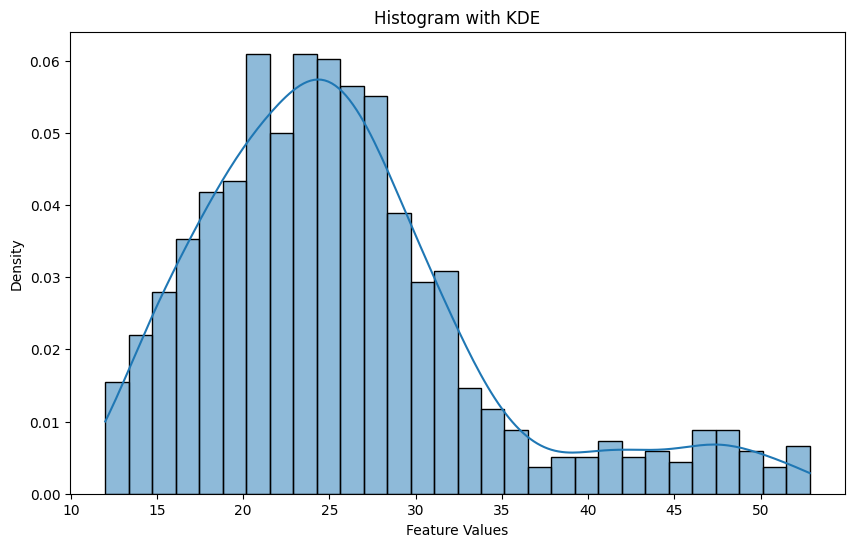

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['feature'], bins=30, kde=True, stat='density')
plt.title('Histogram with KDE')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()


## Identify modes

# Outputs

## Plots

## Download files